# Fundamentos de Imagens Digitais em Python (Demo)

**[Visão Computacional](https://denmartins.github.io/teaching/2025-visao-computacional)** | **[Prof. Dr. Denis Mayr Lima Martins](https://denmartins.github.io/)**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
# No Google Colab, use o comando abaixo
#from google.colab.patches import cv2_imshow



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.11/site-p

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

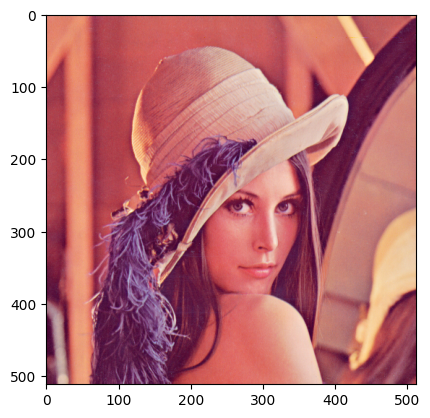

In [3]:

def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image

img = url_to_image("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# No Google Colab, use o comando abaixo
# cv2_imshow(img)

In [4]:
print('Num. linhas em pixels: ', img.shape[0])
print('Num colunas em pixels: ', img.shape[1]) #Colunas da imagem
print('Qtde de canais: ', img.shape[2])
print("Min pixel:", img.min(), "| Max pixel:", img.max())

Num. linhas em pixels:  512
Num colunas em pixels:  512
Qtde de canais:  3
Min pixel: 3 | Max pixel: 255


## Plotando canais

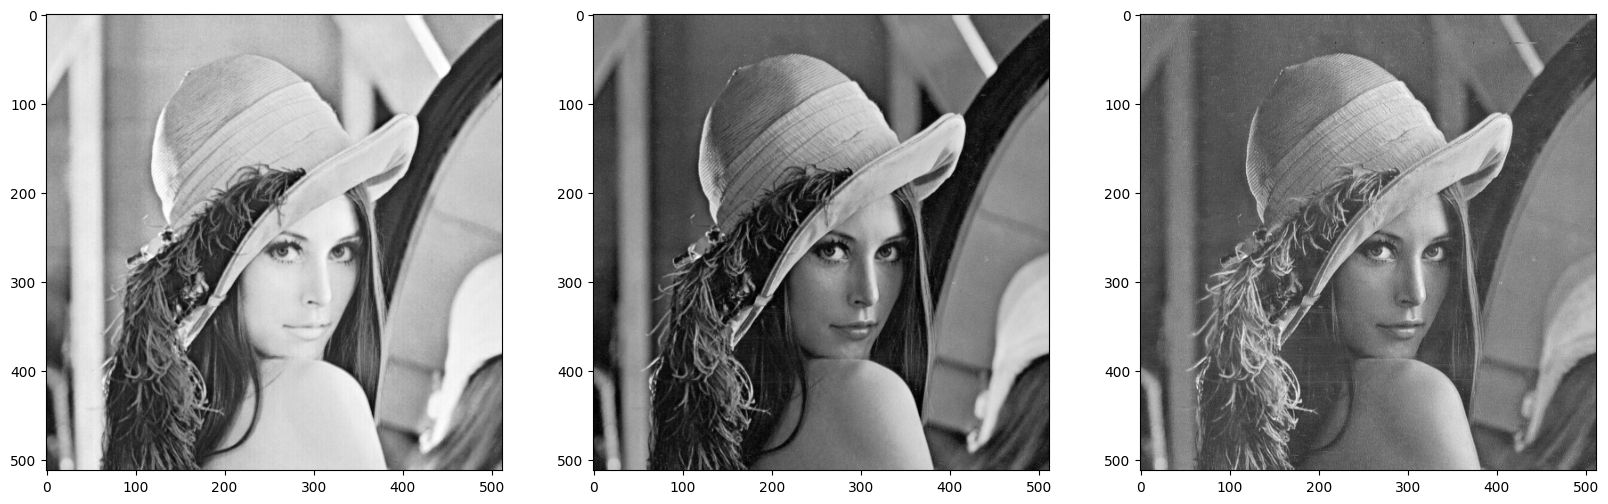

In [5]:
figure, axarr = plt.subplots(1,3, figsize=(20,20))
axarr[0].imshow(img[:,:,0], cmap= 'gray')
axarr[1].imshow(img[:,:,1], cmap= 'gray')
axarr[2].imshow(img[:,:,2], cmap= 'gray')

plt.show()

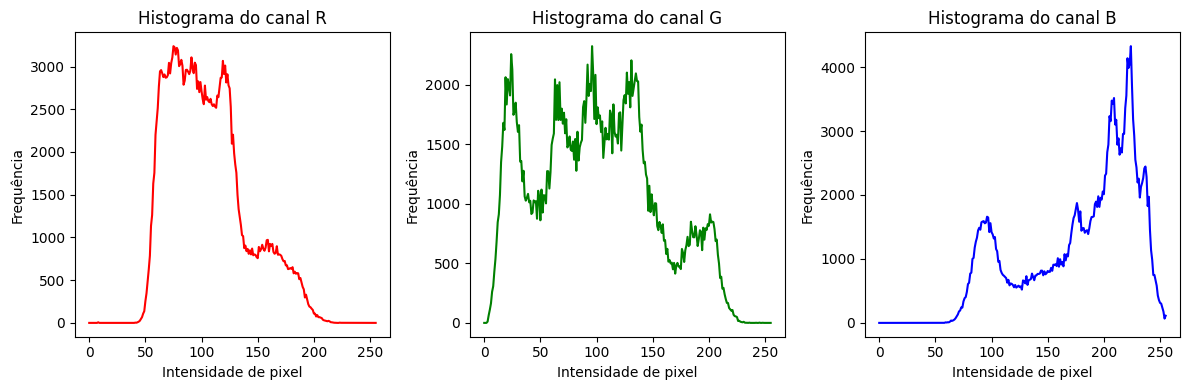

In [ ]:
img = url_to_image("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Extrai os três canais da imagem
b, g, r = cv2.split(img)                 

# Calcula o histogram por canal
def histograma_canal(canal, cor, nome):
    """Calcula o histograma de um canal e cria um plot para ele."""
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])   # 256 bins
    plt.plot(hist, color=cor)
    plt.title(f'Histograma do canal {nome}')
    plt.xlabel('Intensidade de pixel')
    plt.ylabel('Frequência')

# Plota os histogramas
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)                         
histograma_canal(r, 'r', 'R')
plt.subplot(1, 3, 2)                        
histograma_canal(g, 'g', 'G')
plt.subplot(1, 3, 3)                         
histograma_canal(b, 'b', 'B')
plt.tight_layout()
plt.show()

## Zerando canais

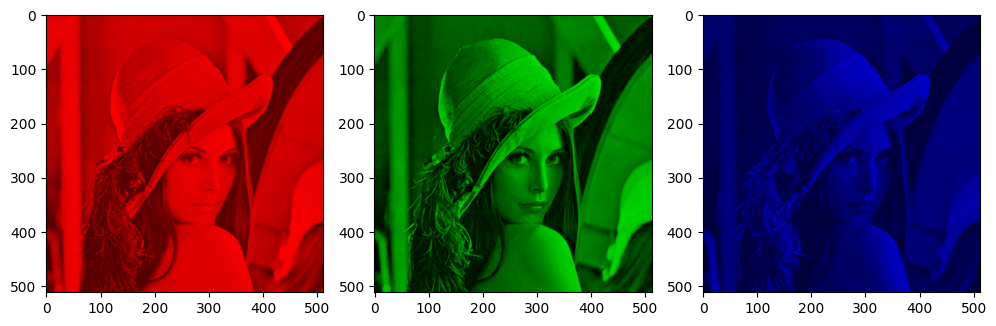

In [7]:
colors = ("r", "g", "b")
plt.figure(figsize=(10,5))
for i, col in enumerate(colors):
    split_img = np.zeros(img.shape, dtype="uint8") # Matrix de zeros
    plt.subplot(1, 3, i+1)
    split_img[ :, :, i] = img[ :, :, i]
    plt.imshow(split_img)

plt.tight_layout()
plt.show()

## Zerando pixels específicos na imagem

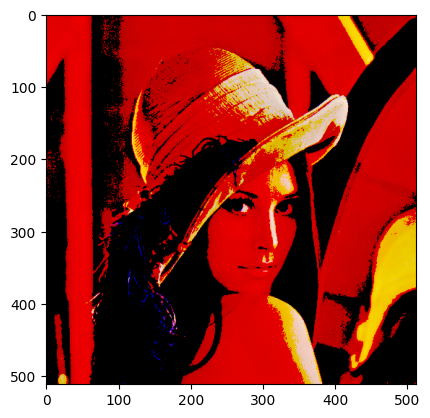

In [9]:

img = url_to_image("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img1 = img
img1[img1 < 180] = 0
# Use a linha abaixo para zerar pixels com intensidade < 180 apenas no canal R
#img1[img1[:, :, 0] < 180] = 0
plt.imshow(img1)
plt.show()

# No Google Colab, use o comando abaixo
# cv2_imshow(img)


## Imagem Negativa

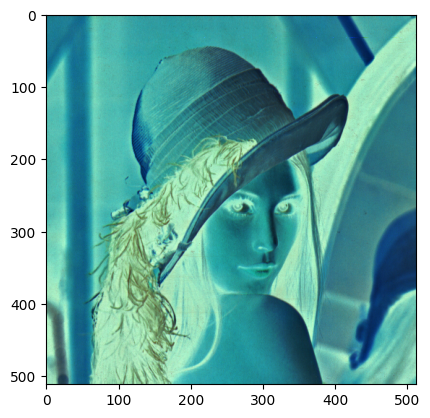

In [10]:
img = url_to_image("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = 255 - img
plt.imshow(img2)
plt.show()

# No Google Colab, use o comando abaixo
# cv2_imshow(img)

## Modificando partes da imagem

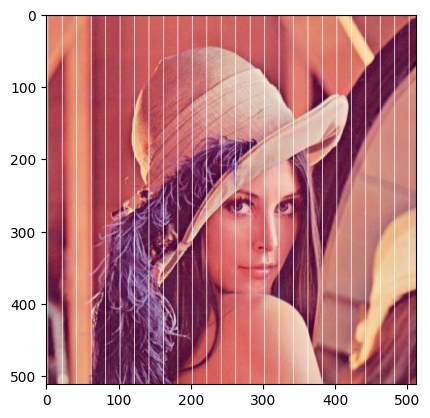

In [ ]:
imagem = url_to_image("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
imagem = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for y in range(0, imagem.shape[0], 20): # Percorre linhas
  for x in range(0, imagem.shape[1], 20): # Percorre colunas
    imagem[y:y+20, x+2] = (255, 255, 255)

imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.show()

# No Google Colab, use o comando abaixo
# cv2_imshow(img)

## Crop

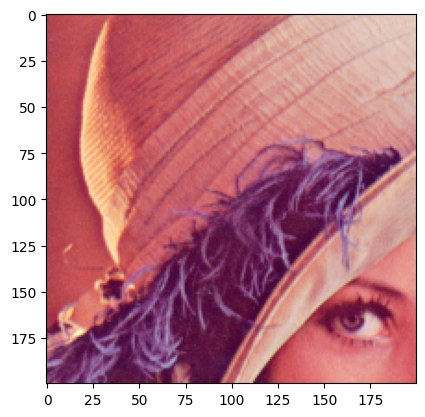

True

In [11]:
img = url_to_image("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

recorte = img[100:300, 100:300] #f(x,y)
plt.imshow(recorte)
plt.show()

# No Google Colab, use o comando abaixo
# cv2_imshow(recorte)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Salva a nova imagem
cv2.imwrite("recorte.png", recorte) #salva no disco